# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

# Load Data

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [ ]:
df.shape

(58645, 13)

# Data Clean

In [ ]:
# Data duplication
print("Data duplication :")
print(df.duplicated().sum())
print("")

Data duplication :
0



In [ ]:
df.eq(' ').sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


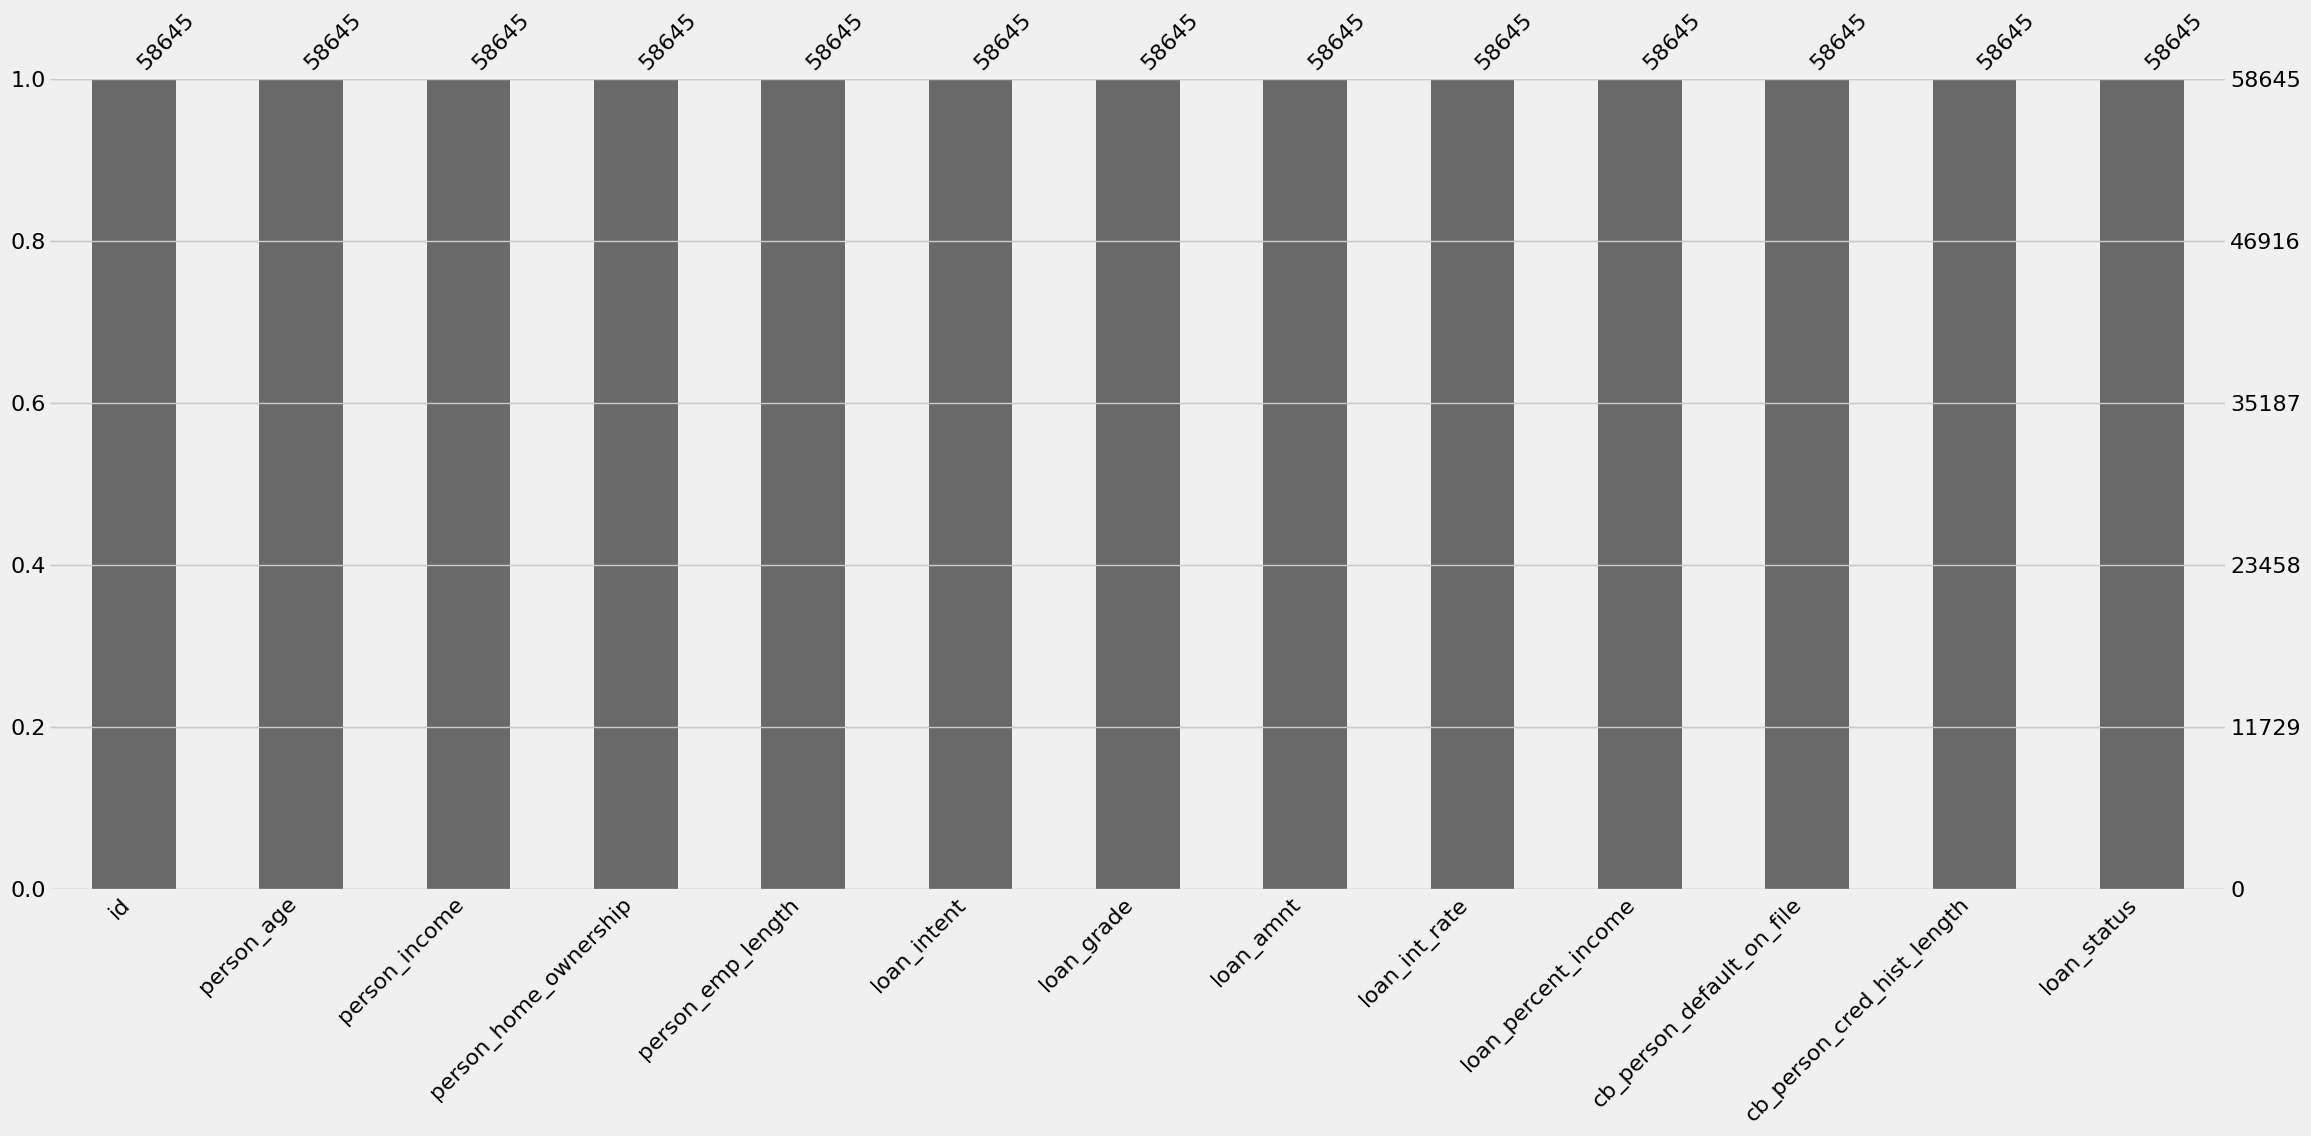

In [ ]:
msno.bar(df)
plt.show()

In [ ]:
# checking for null values
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
id,0,0.0
person_age,0,0.0
person_income,0,0.0
person_home_ownership,0,0.0
person_emp_length,0,0.0
loan_intent,0,0.0
loan_grade,0,0.0
loan_amnt,0,0.0
loan_int_rate,0,0.0
loan_percent_income,0,0.0


# EDA

In [ ]:
# checking data balance
df.loan_status.value_counts(normalize=True)

,proportion
loan_status,
0,0.857618
1,0.142382


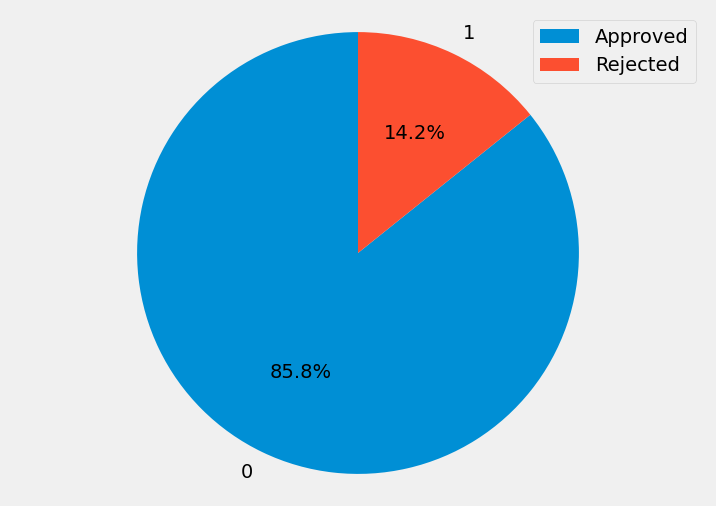

In [ ]:
# Visualisasi loan_status pie chart
loan_status_counts = df['loan_status'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend(['Approved', 'Rejected'])
plt.show()

In [ ]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,58645.0,29322.000000,16929.497605,0.00,14661.00,29322.00,43983.00,58644.00
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106979,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


In [ ]:
#id: Identifikasi unik untuk setiap data atau baris.
#person_age: Usia peminjam.
#person_income: Pendapatan peminjam.
#person_home_ownership: Status kepemilikan rumah peminjam (misalnya, dimiliki, disewa).
#person_emp_length: Lama masa kerja peminjam.
#loan_intent: Tujuan pinjaman (misalnya, membeli rumah, konsolidasi utang).
#loan_grade: Tingkat kredit peminjam (biasanya diberikan oleh lembaga pemberi pinjaman).
#loan_amnt: Jumlah pinjaman yang diajukan.
#loan_int_rate: Tingkat bunga pinjaman.
#loan_percent_income: Persentase pinjaman terhadap pendapatan peminjam.
#cb_person_default_on_file: Apakah peminjam pernah mengalami default pembayaran sebelumnya (biasanya berdasarkan data dari biro kredit).
#cb_person_cred_hist_length: Lama riwayat kredit peminjam.
#loan_status: Status akhir dari pinjaman (disetujui atau ditolak).

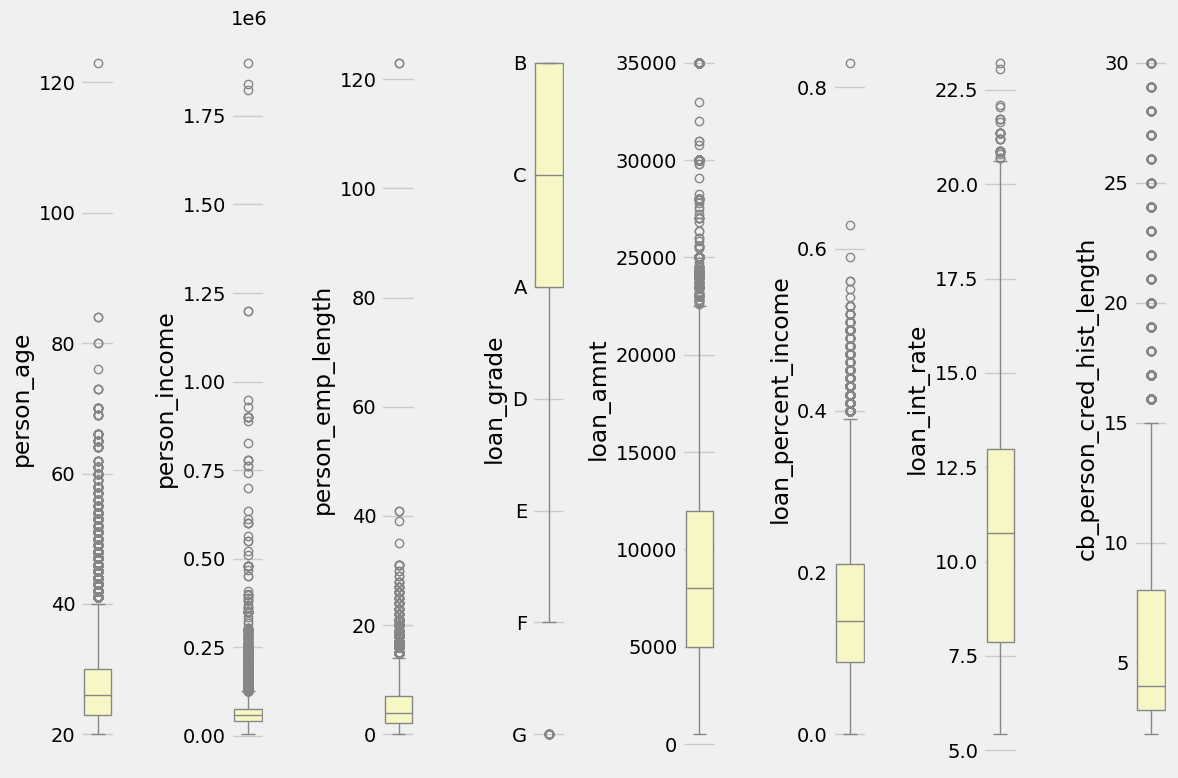

In [ ]:
# Check Outliers
numerical_columns = ['person_age', 'person_income', 'person_emp_length',
                      'loan_grade', 'loan_amnt','loan_percent_income',
                      'loan_int_rate', 'cb_person_cred_hist_length']

plt.figure(figsize=(12,8))

# plotting
features = numerical_columns
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], palette='Spectral')
    plt.tight_layout()

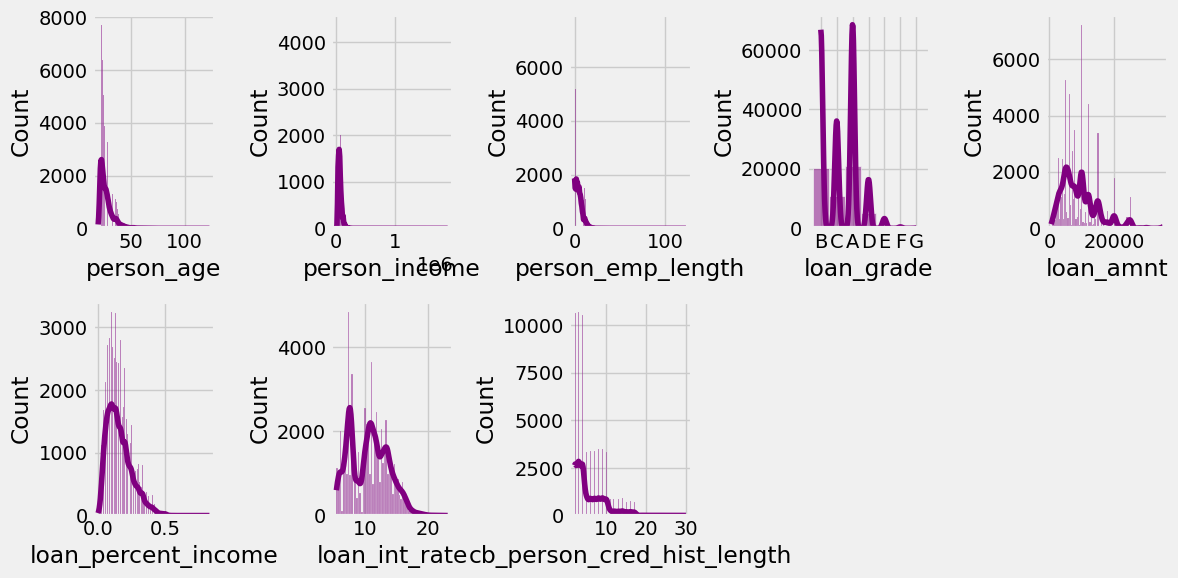

In [ ]:
plt.figure(figsize=(12,6))

# plotting
features = numerical_columns
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=df[features[i]], color='purple', kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [ ]:
# Group data by 'loan_grade' and calculate the default rate
loan_grade_groups = df.groupby('loan_grade')['loan_status'].value_counts(normalize=True).unstack()

# Check the actual column names in loan_grade_groups
print(loan_grade_groups.columns)

Index([0, 1], dtype='int64', name='loan_status')


In [ ]:
loan_grade_groups

loan_status,0,1
loan_grade,,
A,0.950820,0.049180
B,0.897696,0.102304
C,0.864625,0.135375
D,0.406436,0.593564
E,0.374628,0.625372
F,0.389262,0.610738
G,0.181818,0.818182


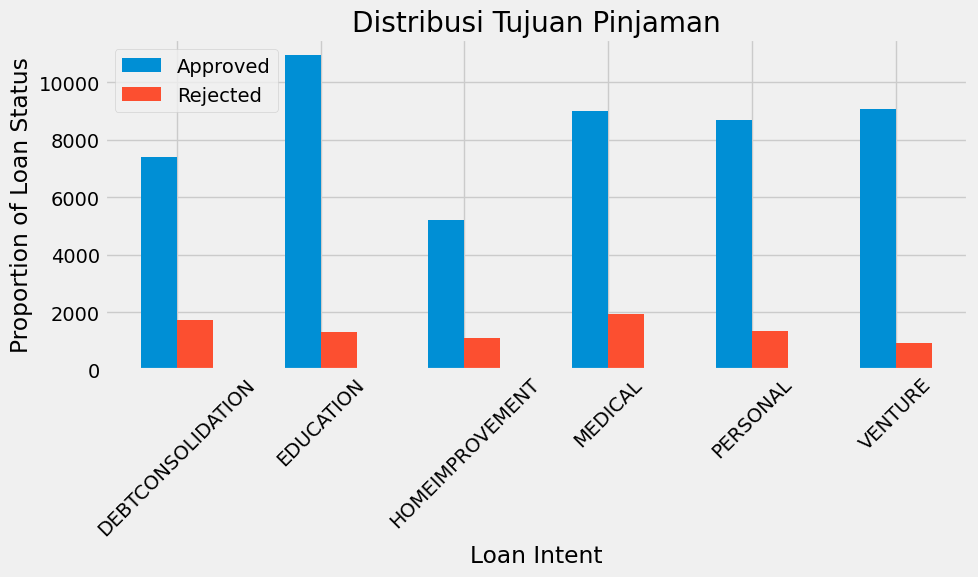

In [ ]:
# Group data by 'loan_intent' and calculate the loan status distribution
loan_intent_status = df.groupby('loan_intent')['loan_status'].value_counts(ascending=True).unstack()

# Plot the distribution
loan_intent_status.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Loan Intent')
plt.ylabel('Proportion of Loan Status')
plt.title('Distribusi Tujuan Pinjaman')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(['Approved', 'Rejected'])
plt.show()

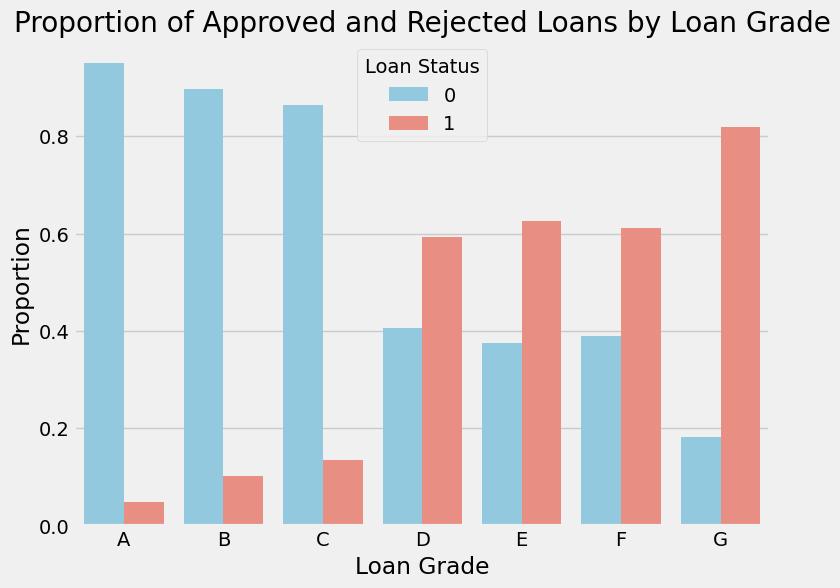

In [ ]:
plt.figure(figsize=(8, 6))
# Melt the DataFrame to have 'loan_status' as a separate column
# Get the actual column names for 'loan_status'
loan_status_columns = loan_grade_groups.columns.tolist()
melted_data = loan_grade_groups.reset_index().melt(
    id_vars=['loan_grade'],
    value_vars=loan_status_columns,
    var_name='loan_status',
    value_name='proportion'
)

# Now use the melted data for the barplot
sns.barplot(x='loan_grade', y='proportion', hue='loan_status', data=melted_data, palette=['skyblue', 'salmon'])
plt.xlabel('Loan Grade')
plt.ylabel('Proportion')
plt.title('Proportion of Approved and Rejected Loans by Loan Grade')
plt.legend(title='Loan Status')
plt.show()

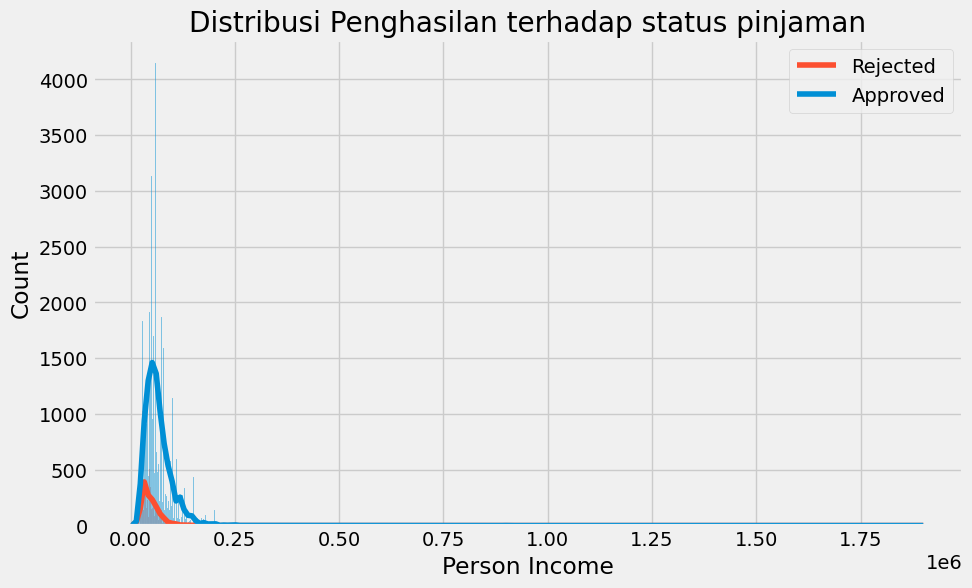

In [ ]:
# Loan Status vs person_income
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='person_income', hue='loan_status', kde=True)
plt.title('Distribusi Penghasilan terhadap status pinjaman')
plt.xlabel('Person Income')
plt.ylabel('Count')
plt.legend(['Rejected', 'Approved'])
plt.show()

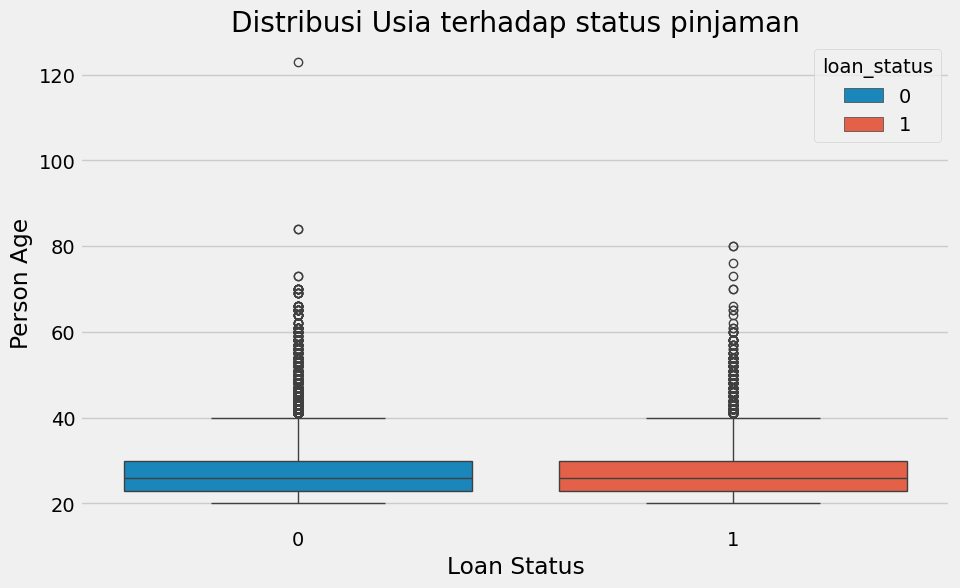

In [ ]:
# Loan Status vs. Person Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='person_age', data=df, hue='loan_status')
plt.title('Distribusi Usia terhadap status pinjaman')
plt.xlabel('Loan Status')
plt.ylabel('Person Age')
plt.show()

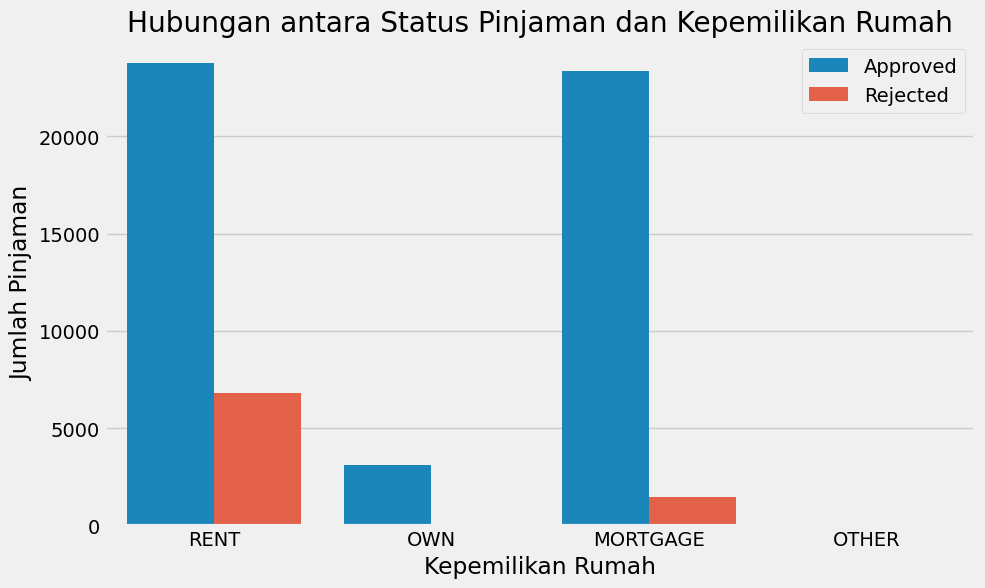

In [ ]:
# Visualisasi hubungan antara loan_status dan person_home_ownership
plt.figure(figsize=(10, 6))
sns.countplot(x='person_home_ownership', hue='loan_status', data=df)
plt.title('Hubungan antara Status Pinjaman dan Kepemilikan Rumah')
plt.xlabel('Kepemilikan Rumah')
plt.ylabel('Jumlah Pinjaman')
plt.legend(['Approved', 'Rejected'])
plt.show()

dapat disimpulkan bahwa sebagian besar orang dalam kelompok data ini memilih untuk menyewa rumah. Namun, kepemilikan rumah sendiri dan melalui KPR juga merupakan pilihan yang cukup populer

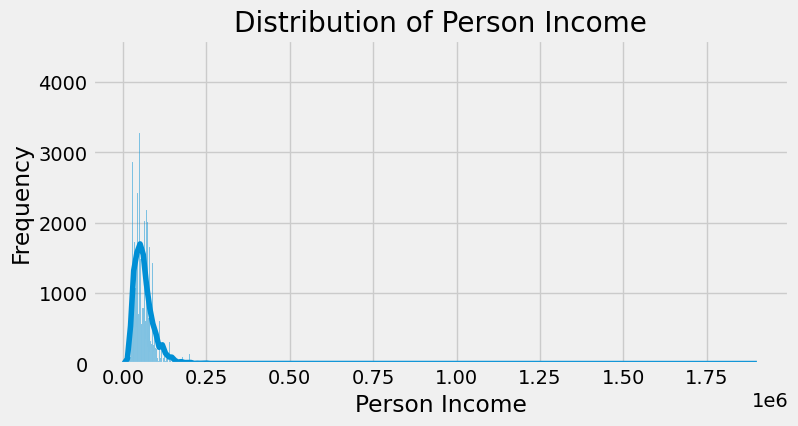

In [ ]:
# distribution of 'person_income'
plt.figure(figsize=(8, 4))
sns.histplot(df['person_income'], kde=True)
plt.title('Distribution of Person Income')
plt.xlabel('Person Income')
plt.ylabel('Frequency')
plt.show()

Persebaran data income Semakin ke kanan, frekuensinya semakin menurun, yang berarti semakin sedikit individu yang memiliki pendapatan tinggi

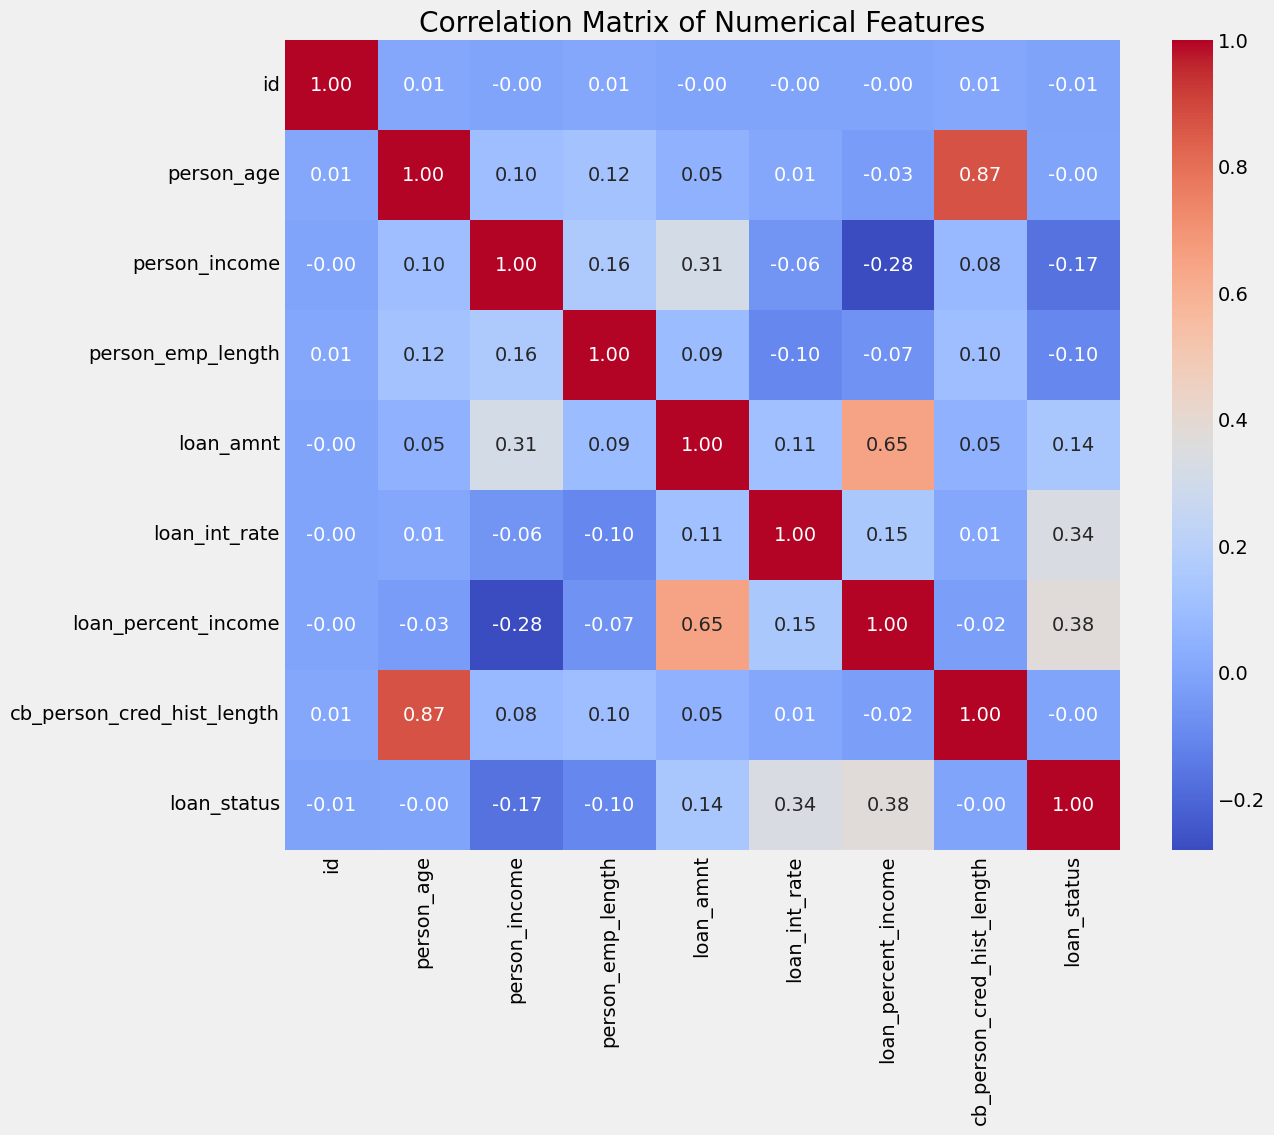

In [ ]:
# Calculate the correlation matrix, only including numerical features
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Feature Engineer

In [ ]:
# Combine 'person_home_ownership' categories
df['person_home_ownership'] = df['person_home_ownership'].replace(['OTHER', 'NONE', 'ANY'], 'OTHER')

In [ ]:
# Create interaction features
df['income_age_ratio'] = df['person_income'] / df['person_age']
df['loan_income_ratio'] = df['loan_amnt'] / df['person_income']
print(df['income_age_ratio'])

0         945.945946
1        2545.454545
2         993.103448
3        2333.333333
4        2727.272727
            ...     
58640    3529.411765
58641    1028.571429
58642    1913.043478
58643    1363.636364
58644    2419.354839
Name: income_age_ratio, Length: 58645, dtype: float64


In [ ]:
print(df['loan_income_ratio'])

0        0.171429
1        0.071429
2        0.208333
3        0.171429
4        0.100000
           ...   
58640    0.208333
58641    0.347222
58642    0.154545
58643    0.166667
58644    0.200000
Name: loan_income_ratio, Length: 58645, dtype: float64


In [ ]:
# Create polynomial features for 'person_age'
df['person_age_squared'] = df['person_age'] ** 2
df['person_age_cubed'] = df['person_age'] ** 3
print(df['person_age_squared'])

0        1369
1         484
2         841
3         900
4         484
         ... 
58640    1156
58641     784
58642     529
58643     484
58644     961
Name: person_age_squared, Length: 58645, dtype: int64


In [ ]:
print(df['person_age_cubed'])

0        50653
1        10648
2        24389
3        27000
4        10648
         ...  
58640    39304
58641    21952
58642    12167
58643    10648
58644    29791
Name: person_age_cubed, Length: 58645, dtype: int64


In [ ]:
# Bin 'person_age' into age groups
bins = [18, 30, 40, 50, 60, float('inf')]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
df['age_group'] = pd.cut(df['person_age'], bins=bins, labels=labels, right=False)

In [ ]:
# Convert categorical features to numerical using Label Encoding
categorical_cols = ['person_home_ownership', 'loan_intent', 'age_group','loan_grade', 'cb_person_default_on_file']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [ ]:
# Display the first few rows of the modified DataFrame
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,income_age_ratio,loan_income_ratio,person_age_squared,person_age_cubed,age_group
0,0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14,0,945.945946,0.171429,1369,50653,1
1,1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0,2545.454545,0.071429,484,10648,0
2,2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0,993.103448,0.208333,841,24389,0
3,3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0,2333.333333,0.171429,900,27000,1
4,4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0,2727.272727,0.100000,484,10648,0


In [ ]:
# Drop unnecessary columns
columns_to_drop = ['id', 'person_age', 'loan_amnt', 'person_income']
df = df.drop(columns=columns_to_drop, axis=1)

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# List of columns to scale (excluding 'loan_status')
columns_to_scale = [col for col in df.columns if col != 'loan_status']

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the first few rows of the scaled DataFrame
df.head()

,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,income_age_ratio,loan_income_ratio,person_age_squared,person_age_cubed,age_group
0,0.913186,-1.187200,-0.881912,-0.063697,0.267616,0.117378,-0.417419,2.031798,0,-1.029310,0.123646,1.394270,1.094680,1.121576
1,0.224728,0.328047,0.278934,0.892168,0.880532,-0.973242,-0.417419,-0.946489,0,0.116911,-0.937229,-0.757114,-0.570413,-0.531431
2,0.224728,0.833130,0.859357,-1.019563,-0.585854,0.553626,-0.417419,1.039036,0,-0.995516,0.515159,0.110732,0.001517,-0.531431
3,0.913186,2.348377,1.439780,-0.063697,0.142396,0.117378,-0.417419,-0.201917,0,-0.035097,0.123646,0.254158,0.110192,1.121576
4,0.913186,-0.682117,0.278934,-1.019563,-1.238314,-0.646056,-0.417419,-0.698298,0,0.247203,-0.634122,-0.757114,-0.570413,-0.531431


# Models

In [ ]:
# Extract features (X) and target (y)
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [ ]:
# splitting data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify=y)

In [ ]:
X.shape, y.shape

((58645, 13), (58645,))

In [ ]:
X_train.head()

,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,income_age_ratio,loan_income_ratio,person_age_squared,person_age_cubed,age_group
36274,0.913186,2.348377,0.278934,-0.063697,0.224777,1.753307,-0.417419,1.535417,-0.273966,1.705243,1.763773,1.455377,1.121576
5989,-1.152188,-0.177035,1.439780,-0.063697,0.102853,0.117378,-0.417419,-0.450108,0.162230,0.073128,-0.647722,-0.507189,-0.531431
13114,-1.152188,-0.429576,1.439780,-1.019563,-1.116389,0.662687,-0.417419,-0.946489,-0.363542,0.662503,-0.533467,-0.438221,-0.531431
46807,0.913186,-0.177035,-0.881912,-1.019563,-1.043894,2.843926,-0.417419,1.039036,-1.186013,2.725315,0.713606,0.482169,1.121576
30316,-1.152188,-0.682117,0.278934,-1.019563,-0.688007,-0.536994,-0.417419,-0.450108,-0.742518,-0.543190,-0.290373,-0.282055,-0.531431


In [ ]:
y_train.head(), y_test.head()

(36274    1
 5989     0
 13114    0
 46807    1
 30316    0
 Name: loan_status, dtype: int64,
 28081    0
 4109     0
 9832     1
 47124    0
 15330    0
 Name: loan_status, dtype: int64)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

acc_lr = f1_score(y_test, y_pred_lr)
acc_lr_train = f1_score(y_train, y_pred_lr_train)

print(f"f1 Score of Logistic Regression is : {acc_lr}")
print(f"f1 Score of Logistic Regression is : {acc_lr_train}")


f1 Score of Logistic Regression is : 0.5396425874653914
f1 Score of Logistic Regression is : 0.5360959651035987


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

acc_knn = f1_score(y_test, y_pred_knn)
acc_knn_train = f1_score(y_train, y_pred_knn_train)

print(f"f1 Score of KNeighborsClassifier is : {acc_knn}")
print(f"f1 Score of KNeighborsClassifier is : {acc_knn_train}")
print(f"Accuracy Score of knn is : {acc_knn}")
knn_report = classification_report(y_test, y_pred_knn)
print(f"Classification Report : \n{knn_report}")

f1 Score of KNeighborsClassifier is : 0.6923774954627949
f1 Score of KNeighborsClassifier is : 0.7659697466037191
Accuracy Score of knn is : 0.6923774954627949
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     15089
           1       0.80      0.61      0.69      2505

    accuracy                           0.92     17594
   macro avg       0.87      0.79      0.82     17594
weighted avg       0.92      0.92      0.92     17594



In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)
y_pred_dtc_train = dtc.predict(X_train)

acc_dtc = f1_score(y_test, y_pred_dtc)
acc_dtc_train = f1_score(y_train, y_pred_dtc_train)

print(f"f1 Score of DecisionTreeClassifier is : {acc_dtc}")
print(f"f1 Score of DecisionTreeClassifier is : {acc_dtc_train}")

f1 Score of DecisionTreeClassifier is : 0.6910852713178295
f1 Score of DecisionTreeClassifier is : 1.0


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [ ]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)
print(f"Accuracy Score of cat Boost Classifier is : {acc_cat}")
print(f"Classification Report : \n{clf_report}")

Learning rate set to 0.415741
0:	learn: 0.4409194	total: 72.1ms	remaining: 7.13s
1:	learn: 0.3276309	total: 93.5ms	remaining: 4.58s
2:	learn: 0.2704060	total: 119ms	remaining: 3.85s
3:	learn: 0.2366455	total: 143ms	remaining: 3.42s
4:	learn: 0.2161398	total: 174ms	remaining: 3.31s
5:	learn: 0.2036543	total: 195ms	remaining: 3.06s
6:	learn: 0.1959447	total: 219ms	remaining: 2.9s
7:	learn: 0.1915050	total: 230ms	remaining: 2.65s
8:	learn: 0.1868553	total: 262ms	remaining: 2.65s
9:	learn: 0.1841932	total: 279ms	remaining: 2.51s
10:	learn: 0.1826191	total: 287ms	remaining: 2.32s
11:	learn: 0.1809854	total: 324ms	remaining: 2.37s
12:	learn: 0.1792453	total: 332ms	remaining: 2.22s
13:	learn: 0.1788443	total: 342ms	remaining: 2.1s
14:	learn: 0.1780529	total: 353ms	remaining: 2s
15:	learn: 0.1776736	total: 366ms	remaining: 1.92s
16:	learn: 0.1773127	total: 376ms	remaining: 1.84s
17:	learn: 0.1768022	total: 387ms	remaining: 1.76s
18:	learn: 0.1734343	total: 397ms	remaining: 1.69s
19:	learn: 0.1

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
confi = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of xgb is : {acc_xgb}")
print(f"Confusion Matrix : \n{confi}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of xgb is : 0.9499829487325224
Confusion Matrix : 
[[14919   170]
 [  710  1795]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15089
           1       0.91      0.72      0.80      2505

    accuracy                           0.95     17594
   macro avg       0.93      0.85      0.89     17594
weighted avg       0.95      0.95      0.95     17594



In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

nb = GaussianNB()
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
y_pred_nb_train = nb.predict(X_train)

acc_nb = f1_score(y_test, y_pred_nb)
acc_nb_train = f1_score(y_train, y_pred_nb_train)

print(f"f1 Score of GaussianNB is : {acc_nb}")
print(f"f1 Score of GaussianNB is : {acc_nb_train}")

f1 Score of GaussianNB is : 0.5851234369990381
f1 Score of GaussianNB is : 0.5864682375637316


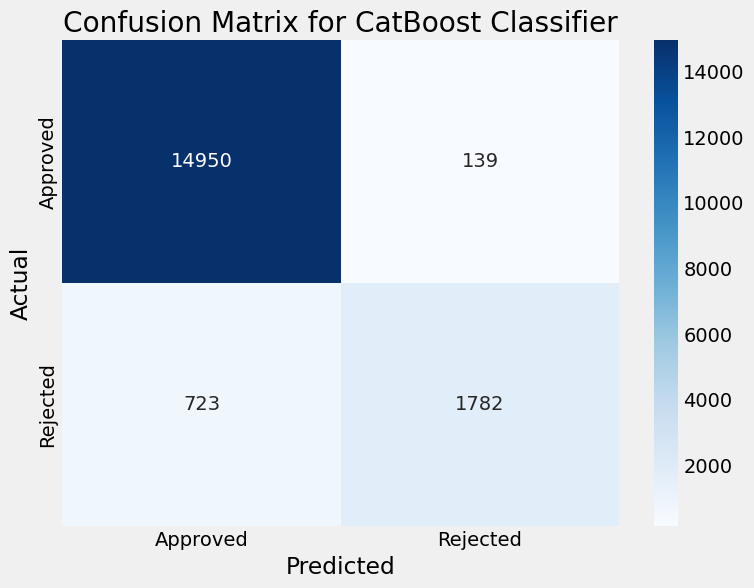

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_cat)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Approved', 'Rejected'],
            yticklabels=['Approved', 'Rejected'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()

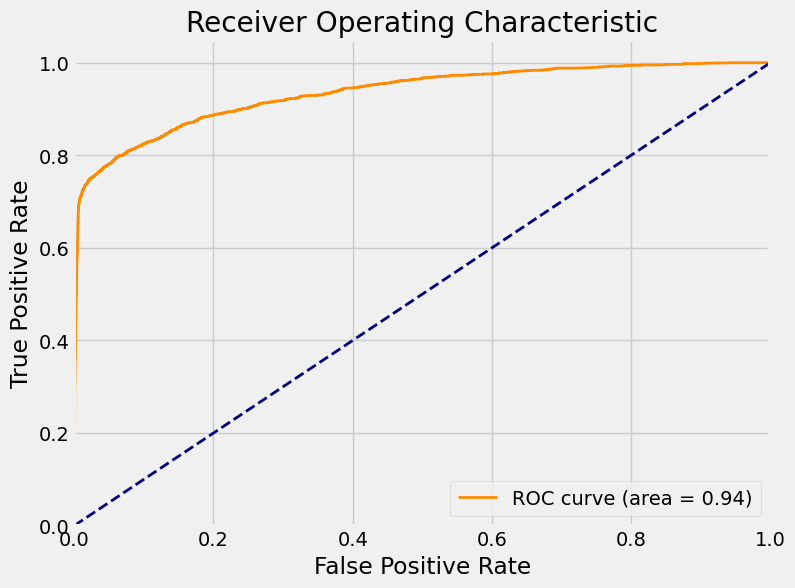

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have y_test and the predicted probabilities from your model
# For example, using the CatBoostClassifier:
y_pred_proba_cat = cat.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_cat)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluation

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Cat Boost', 'Naive Bayes', 'XGBoost'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_cat, acc_nb, acc_xgb]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Cat Boost,0.951006
5,XGBoost,0.949983
1,KNN,0.692377
2,Decision Tree Classifier,0.691085
4,Naive Bayes,0.585123
0,Logistic Regression,0.539643


In [ ]:
# Sort the DataFrame before plotting
models = models.sort_values(by='Score', ascending=True)

# Create the bar chart without the 'ascending' argument
fig = px.bar(
    data_frame=models,
    x='Score',
    y='Model',
    color='Score',
    template='plotly_dark',
    title='Models Comparison'
)

# Show the chart
fig.show()

# Interpretation

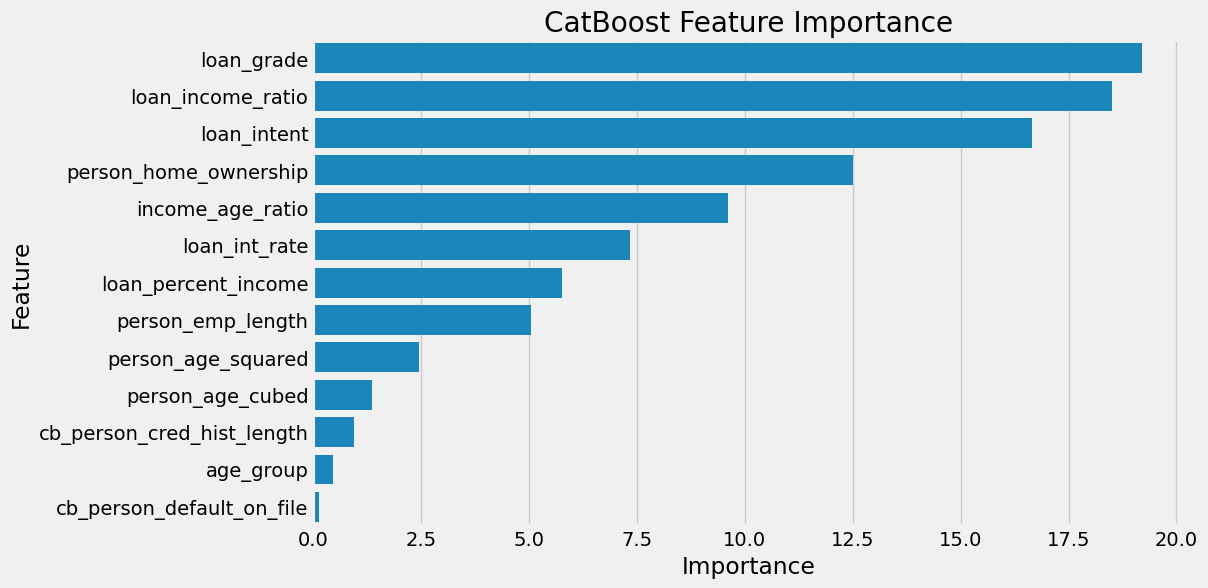

In [ ]:
# Get feature importances
from catboost import Pool # Import Pool from catboost
feature_importances = cat.get_feature_importance(Pool(X_train, label=y_train))

# Create a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('CatBoost Feature Importance')
plt.show()